With IFO0880_jsb and NP11 model make simulations with three different growth rates (see table below) and knock-out either XPK or ACITL and none for the control. There's no glc uptake data yet, use glc max. Then constrain also the glc rates and optimize for NGAM min. Make the usual graphs and tables, all fluxes file, and escher map.

	           Control	  XPK∆	     ACL∆
GR	           0,313	  0,269	     0,184 (lab data)
Glucose uptake 4.146102 3.567386   2.458913 (simulated values Rt_jsb)	
                [3.893592, 3.368067, 2.331876 NP11]	

In [18]:
import cobra
import pandas as pd
import os
from os.path import join
from cobra import Model, Reaction, Metabolite
from cobra.sampling import sampling
import numpy as np
# os.environ["R_HOME"] = f"{os.environ['CONDA_PREFIX']}\\Lib\\R"
# import rpy2.robjects
from plotnine import *
import matplotlib.pyplot as plt

IFO0880_jsb

In [19]:
# # Importing the model, calculating glc uptakes

# rt_jsb_model1=cobra.io.read_sbml_model("C:\\Users\\Maive\\Desktop\\BSc_loputoo\\Model_files\\Rt_IFO0880_jsb.xml")
# rt_jsb_model1.objective = "EX_glc__D_e" 

# solution1 = rt_jsb_model1.optimize()
# all_fluxes = solution1.fluxes.to_frame(name='Flux')


# knock_outs = ['Control', 'XPK knock-out', 'ACITL knock-out']
# growth_rates = [0.313, 0.269, 0.184]

# # Get all fluxes on different knock-outs
# all_fluxes_dif_knock_outs = pd.DataFrame(columns=[ 'Growth rate','Glucose uptake', *all_fluxes.index], index=knock_outs) #flux_values.index gives the row names column, * extracts the list of strings

# for i in range(len(growth_rates)):

#     rt_jsb_model=cobra.io.read_sbml_model("C:\\Users\\Maive\\Desktop\\BSc_loputoo\\Model_files\\Rt_IFO0880_jsb.xml")

#     rt_jsb_model.objective = "EX_glc__D_e" 
#     rt_jsb_model.reactions.EX_glc__D_e.bounds = -9999, 9999
#     rt_jsb_model.reactions.BIOMASS_RT.bounds = growth_rates[i], growth_rates[i]
#     if i == 1:
#         rt_jsb_model.reactions.XPK.bounds = 0, 0
#     elif i == 2:
#         rt_jsb_model.reactions.ACITL.bounds = 0, 0     

#     rt_jsb_solution = rt_jsb_model.optimize()
    
#     all_fluxes_dif_knock_outs.loc[knock_outs[i]] = rt_jsb_solution.fluxes[[ 'BIOMASS_RT','EX_glc__D_e', *all_fluxes.index]].values

# all_fluxes_dif_knock_outs


In [20]:
# Simulations with ATPM min

rt_jsb_model1=cobra.io.read_sbml_model("C:\\Users\\Maive\\Desktop\\BSc_loputoo\\Model_files\\Rt_IFO0880_jsb.xml")
rt_jsb_model1.objective = "ATPM" 

solution1 = rt_jsb_model1.optimize('minimize')
all_fluxes = solution1.fluxes.to_frame(name='Flux')


knock_outs = ['Control', 'XPK knock-out', 'ACITL knock-out']
growth_rates = [0.313, 0.269, 0.184]
glucose_uptakes = [4.146102, 3.567386, 2.458913]

# Get all fluxes on different knock-outs
all_fluxes_dif_knock_outs = pd.DataFrame(columns=[ 'Growth rate','Glucose uptake', *all_fluxes.index], index=knock_outs) #flux_values.index gives the row names column, * extracts the list of strings

for i in range(len(growth_rates)):

    rt_jsb_model=cobra.io.read_sbml_model("C:\\Users\\Maive\\Desktop\\BSc_loputoo\\Model_files\\Rt_IFO0880_jsb.xml")

    rt_jsb_model.objective = "ATPM" 
    rt_jsb_model.reactions.EX_glc__D_e.bounds = -(glucose_uptakes[i]), -(glucose_uptakes[i])
    rt_jsb_model.reactions.BIOMASS_RT.bounds = growth_rates[i], growth_rates[i]
    if i == 1:
        rt_jsb_model.reactions.XPK.bounds = 0, 0
    elif i == 2:
        rt_jsb_model.reactions.ACITL.bounds = 0, 0     

    rt_jsb_solution = rt_jsb_model.optimize('minimize')
    
    all_fluxes_dif_knock_outs.loc[knock_outs[i]] = rt_jsb_solution.fluxes[[ 'BIOMASS_RT','EX_glc__D_e', *all_fluxes.index]].values

all_fluxes_dif_knock_outs

,Growth rate,Glucose uptake,ALCD25yi,MTHFCm,AMPN,DAGCPTer_RT,PYRt2,NNDPRm,HMGCOASm,PDE4,...,BTNt2i,EX_fol_e,FOLt,NADtm,EX_pydxn_e,PYDXNtr,RIBFLVt2,tr_0001,EXC_OUT_phyto_d,MDHc
Control,0.313,-4.146102,0.0,0.0,0.0,0.0,0.0,0.0,-0.00055,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-2.426029
XPK knock-out,0.269,-3.567386,0.0,0.0,0.0,0.0,0.0,0.0,-0.000474,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.749125
ACITL knock-out,0.184,-2.458913,0.0,0.0,0.0,0.0,0.0,0.0,-0.000323,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.657045


In [21]:
# Get specific metabolites with their fluxes
exchange_fluxes_table = all_fluxes_dif_knock_outs[['BIOMASS_RT', 'EX_glc__D_e', 'EX_o2_e', 'EX_nh4_e','EX_so4_e','EX_pi_e', 'EX_co2_e']]
exchange_fluxes_table

,BIOMASS_RT,EX_glc__D_e,EX_o2_e,EX_nh4_e,EX_so4_e,EX_pi_e,EX_co2_e
Control,0.313,-4.146102,-9.046618,-2.066023,-0.031374,-0.083325,10.21713
XPK knock-out,0.269,-3.567386,-7.794402,-1.775462,-0.026964,-0.071586,8.801982
ACITL knock-out,0.184,-2.458913,-5.450841,-1.214576,-0.018444,-0.048984,6.137998


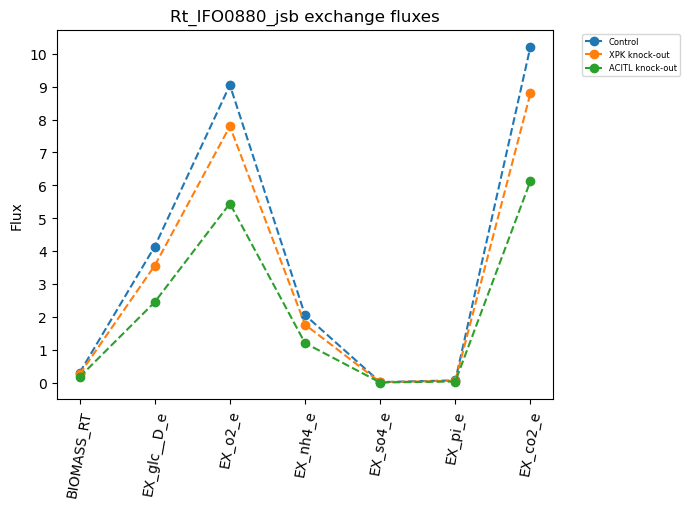

In [22]:
# Exchange fluxes plot

for i in range(len(knock_outs)):
    plt.plot(exchange_fluxes_table.columns, np.abs(exchange_fluxes_table.iloc[i, :]), 'o--', label = knock_outs[i])

# plt.xlabel('Reactions')
plt.ylabel('Flux')
plt.title("Rt_IFO0880_jsb exchange fluxes")
plt.legend(fontsize=6, loc='upper left', bbox_to_anchor=(1.05, 1))
plt.xticks(range(0, 7, 1), rotation=80)
plt.yticks(range(0, 11, 1))
plt.show()


In [23]:
PPP_fluxes = all_fluxes_dif_knock_outs[['BIOMASS_RT', 'EX_glc__D_e', 'G6PDH2r', 'TKT1', 'TALA','TKT2', 'XPK', 'PYRDC','PDHm', 'FPK', 'FBA']]
PPP_fluxes = PPP_fluxes.rename(columns = {'G6PDH2r': 'oxpp'})
# for i in range(len(PPP_fluxes.columns)):
#     PPP_fluxes = PPP_fluxes.rename(columns = {PPP_fluxes.columns[i]: getattr(rt_jsb_model1.reactions, PPP_fluxes.columns[i]).name})

PPP_fluxes

,BIOMASS_RT,EX_glc__D_e,oxpp,TKT1,TALA,TKT2,XPK,PYRDC,PDHm,FPK,FBA
Control,0.313,-4.146102,0.77144,0.108483,0.0,0.049899,0.0,0.287646,4.22718,0.0,2.628516
XPK knock-out,0.269,-3.567386,0.458715,0.025174,-2.399355,-0.025174,0.0,0.247212,3.709421,0.0,0.0
ACITL knock-out,0.184,-2.458913,0.358581,-0.296023,-0.296023,0.653963,0.0,0.169094,1.903469,0.984425,1.005884


In [24]:
ATPM_ACITL_fluxes = all_fluxes_dif_knock_outs[['BIOMASS_RT', 'EX_glc__D_e', 'ACITL', 'ATPM']] #ACS - Acetyl-CoA synthetase
ATPM_ACITL_fluxes

,BIOMASS_RT,EX_glc__D_e,ACITL,ATPM
Control,0.313,-4.146102,1.676892,1.22
XPK knock-out,0.269,-3.567386,1.443462,1.22
ACITL knock-out,0.184,-2.458913,0.0,1.22


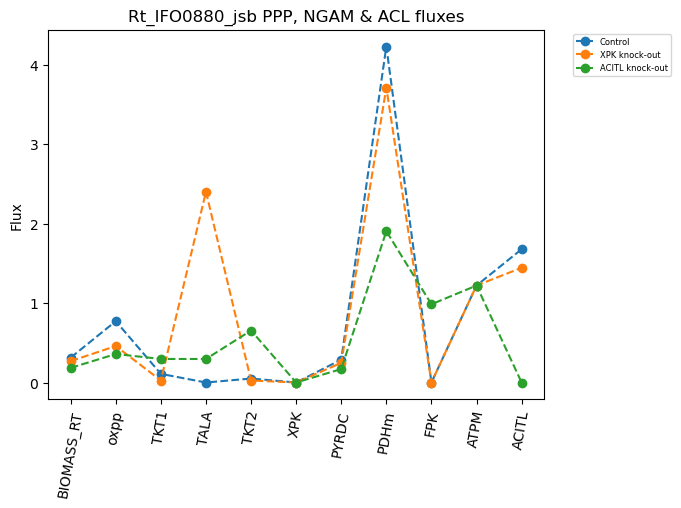

In [25]:
# Plot the PPP enzymes fluxes with ATPM and ACITL on seperate y-axis
GR_range = all_fluxes_dif_knock_outs['BIOMASS_RT']
# Sample data
x = GR_range
y1 = np.abs(ATPM_ACITL_fluxes[['ATPM', 'ACITL']])
y2 = np.abs(PPP_fluxes[['oxpp', 'TKT1', 'TALA','TKT2', 'XPK','PYRDC','PDHm', 'FPK', 'FBA']])

# Plot the PPP enzymes fluxes with ATPM and ACITL 


y = np.abs(all_fluxes_dif_knock_outs[['BIOMASS_RT', 'G6PDH2r', 'TKT1', 'TALA','TKT2', 'XPK','PYRDC','PDHm', 'FPK', 'ATPM', 'ACITL']])

for i in range(len(knock_outs)):
    plt.plot(['BIOMASS_RT', 'oxpp', 'TKT1', 'TALA','TKT2', 'XPK','PYRDC','PDHm', 'FPK', 'ATPM', 'ACITL'], y.iloc[i, :], 'o--', label = knock_outs[i])

# plt.xlabel('Reactions')
plt.ylabel('Flux')
plt.title("Rt_IFO0880_jsb PPP, NGAM & ACL fluxes")
plt.legend(fontsize=6, loc='upper left', bbox_to_anchor=(1.05, 1))
plt.xticks(rotation=80)
# plt.yticks(range(0, 4))
plt.show()

In [26]:
# # Get all fluxes to excel
# with pd.ExcelWriter('C:\\Users\\Maive\\Desktop\\BSc_loputoo\\Results\\Knock-outs\\Rt_IFO0880_jsb_all_fluxes_knock_outs.xlsx') as excel_writer:
#     all_fluxes_dif_knock_outs.to_excel(excel_writer, sheet_name='Sheet1', index=True)

In [27]:
# # Get csv files
# for i in range(len(knock_outs)):
#     all_fluxes_dif_knock_outs.iloc[i].to_csv(f'C:\\Users\\Maive\\Desktop\\BSc_loputoo\\Results\\Knock-outs\\Rt_IFO0880_jsb_all_fluxes_{knock_outs[i]}.csv', index=True)


NP11

In [28]:
# # Importing the model, calculating glc uptakes

# NP11_model1=cobra.io.read_sbml_model("C:\\Users\\Maive\\Desktop\\BSc_loputoo\\Model_files\\NP11\\rhto.xml")
# NP11_model1.objective = "r_1714"  #glc

# solution1 = NP11_model1.optimize()
# all_fluxes = solution1.fluxes.to_frame(name='Flux')


# knock_outs = ['Control', 'XPK knock-out', 'ACITL knock-out']
# growth_rates = [0.313, 0.269, 0.184]

# # Get all fluxes on different knock-outs
# all_fluxes_dif_knock_outs = pd.DataFrame(columns=[ 'Growth rate', 'Glucose uptake', *all_fluxes.index], index=knock_outs) #flux_values.index gives the row names column, * extracts the list of strings

# for i in range(len(growth_rates)):

#     NP11_model=cobra.io.read_sbml_model("C:\\Users\\Maive\\Desktop\\BSc_loputoo\\Model_files\\NP11\\rhto.xml")

#     NP11_model.objective = "r_1714" 
#     NP11_model.reactions.r_1714.bounds = -9999, 9999
#     NP11_model.reactions.r_4041.bounds = growth_rates[i], growth_rates[i]
#     if i == 1:
#         NP11_model.reactions.t_0081.bounds = 0, 0
#     elif i == 2:
#         NP11_model.reactions.y200003.bounds = 0, 0     

#     NP11_model_solution = NP11_model.optimize()
    
#     all_fluxes_dif_knock_outs.loc[knock_outs[i]] = NP11_model_solution.fluxes[[  'r_4041','r_1714', *all_fluxes.index]].values

# all_fluxes_dif_knock_outs


In [29]:
# NGAM min

NP11_model1=cobra.io.read_sbml_model("C:\\Users\\Maive\\Desktop\\BSc_loputoo\\Model_files\\NP11\\rhto.xml")
NP11_model1.objective = 'r_4046' # NGAM

solution1 = NP11_model1.optimize('minimize')
all_fluxes = solution1.fluxes.to_frame(name='Flux')


knock_outs = ['Control', 'XPK knock-out', 'ACITL knock-out']
growth_rates = [0.313, 0.269, 0.184]
glucose_uptakes = [3.893592, 3.368067, 2.331876]

# Get all fluxes on different knock-outs
all_fluxes_dif_knock_outs = pd.DataFrame(columns=[ 'Growth rate', 'Glucose uptake', *all_fluxes.index], index=knock_outs) #flux_values.index gives the row names column, * extracts the list of strings

for i in range(len(growth_rates)):

    NP11_model=cobra.io.read_sbml_model("C:\\Users\\Maive\\Desktop\\BSc_loputoo\\Model_files\\NP11\\rhto.xml")

    NP11_model.objective = 'r_4046' # NGAM
    NP11_model.reactions.r_1714.bounds = -(glucose_uptakes[i]), -(glucose_uptakes[i])
    NP11_model.reactions.r_4041.bounds = growth_rates[i], growth_rates[i]
    if i == 1:
        NP11_model.reactions.t_0081.bounds = 0, 0  #XPK
    elif i == 2:
        NP11_model.reactions.y200003.bounds = 0, 0 # ACITL    

    NP11_model_solution = NP11_model.optimize('minimize')
    
    all_fluxes_dif_knock_outs.loc[knock_outs[i]] = NP11_model_solution.fluxes[[ 'r_4041','r_1714', *all_fluxes.index]].values

all_fluxes_dif_knock_outs

,Growth rate,Glucose uptake,r_0001,r_0002,r_0003,r_0004,r_0005,r_0006,r_0007,r_0012,...,y300064,y300065,y300066,y300068,y300069,y300070,y300072,y300074,y300075,y300078
Control,0.313,-3.893592,0.0,0.0,0.0,0.0,0.337522,0.11274,0.016954,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
XPK knock-out,0.269,-3.368067,0.0,0.0,0.0,0.0,0.290075,0.096891,0.014571,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ACITL knock-out,0.184,-2.331876,0.0,0.0,0.0,0.0,0.198416,0.066275,0.009967,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [30]:
# Exchange fluxes
exchange_fluxes_table = all_fluxes_dif_knock_outs[['r_4041', 'r_1714', 'r_1992', 'r_1654','r_2060','r_2005', 'r_1672']]

for i in range(len(exchange_fluxes_table.columns)):
    exchange_fluxes_table = exchange_fluxes_table.rename(columns = {exchange_fluxes_table.columns[i]: getattr(NP11_model1.reactions, exchange_fluxes_table.columns[i]).name[:-6]}) #

exchange_fluxes_table = exchange_fluxes_table.rename(columns = {'biomass pseudore': 'growth rate'})

exchange_fluxes_table

,growth rate,D-glucose ex,oxygen ex,ammonium ex,sulphate ex,phosphate ex,carbon dioxide ex
Control,0.313,-3.893592,-9.417569,-1.286285,-0.026608,-0.068765,10.441098
XPK knock-out,0.269,-3.368067,-8.224607,-1.105457,-0.022867,-0.059098,9.104252
ACITL knock-out,0.184,-2.331876,-5.794163,-0.756151,-0.015642,-0.040424,6.395857


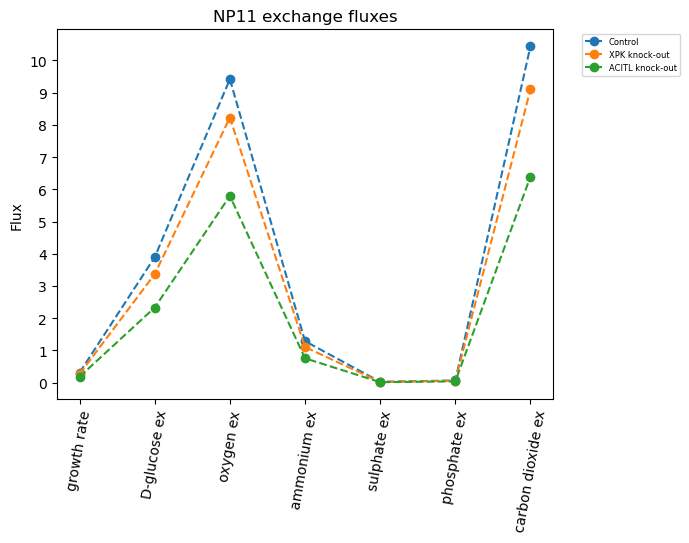

In [31]:
# Exchange fluxes plot

for i in range(len(knock_outs)):
    plt.plot(exchange_fluxes_table.columns, np.abs(exchange_fluxes_table.iloc[i, :]), 'o--', label = knock_outs[i])

# plt.xlabel('Reactions')
plt.ylabel('Flux')
plt.title("NP11 exchange fluxes")
plt.legend(fontsize=6, loc='upper left', bbox_to_anchor=(1.05, 1))
plt.xticks(range(0, 7, 1), rotation=80)
plt.yticks(range(0, 11, 1))
plt.show()

In [32]:
PPP_fluxes = all_fluxes_dif_knock_outs[['r_4041', 'r_1714', 'r_0466', 'r_1049', 'r_1048','r_1050', 't_0081', 'r_0959', 'r_0961', 'r_0450']]
# Change G6PDH2rp column name to oxpp 

for i in range(len(PPP_fluxes.columns)):
    PPP_fluxes = PPP_fluxes.rename(columns = {PPP_fluxes.columns[i]: getattr(NP11_model1.reactions, PPP_fluxes.columns[i]).name})

PPP_fluxes = PPP_fluxes.rename(columns = {'glucose 6-phosphate dehydrogenase': 'oxpp'})
PPP_fluxes = PPP_fluxes.rename(columns = {'biomass pseudoreaction': 'growth rate'})

PPP_fluxes

,growth rate,D-glucose exchange,oxpp,transketolase 1,transaldolase,transketolase 2,phosphoketolase,pyruvate decarboxylase,pyruvate dehydrogenase,fructose-bisphosphate aldolase
Control,0.313,-3.893592,1.834338,0.425483,0.425483,0.372505,0.522928,0.618491,2.803174,1.842307
XPK knock-out,0.269,-3.368067,1.570177,0.513376,-1.393467,0.467846,0.0,0.565831,2.707609,0.0
ACITL knock-out,0.184,-2.331876,1.078328,0.250129,0.250129,0.218986,0.307388,0.363606,1.733853,1.126019


In [33]:
# ATPM and ACITL fluxs
ATPM_ACITL_fluxes = all_fluxes_dif_knock_outs[['r_4041', 'r_1714', 'y200003', 'r_4046']]
for i in range(len(ATPM_ACITL_fluxes.columns)):
    ATPM_ACITL_fluxes = ATPM_ACITL_fluxes.rename(columns = {ATPM_ACITL_fluxes.columns[i]: getattr(NP11_model1.reactions, ATPM_ACITL_fluxes.columns[i]).name})
ATPM_ACITL_fluxes = ATPM_ACITL_fluxes.rename(columns = {'non-growth associated maintenance reaction': 'NGAM'})
ATPM_ACITL_fluxes = ATPM_ACITL_fluxes.rename(columns = {'biomass pseudoreaction': 'growth rate'})



ATPM_ACITL_fluxes

,growth rate,D-glucose exchange,ATP-citrate lyase,NGAM
Control,0.313,-3.893592,0.0,3.3928
XPK knock-out,0.269,-3.368067,0.415133,3.3928
ACITL knock-out,0.184,-2.331876,0.0,3.3928


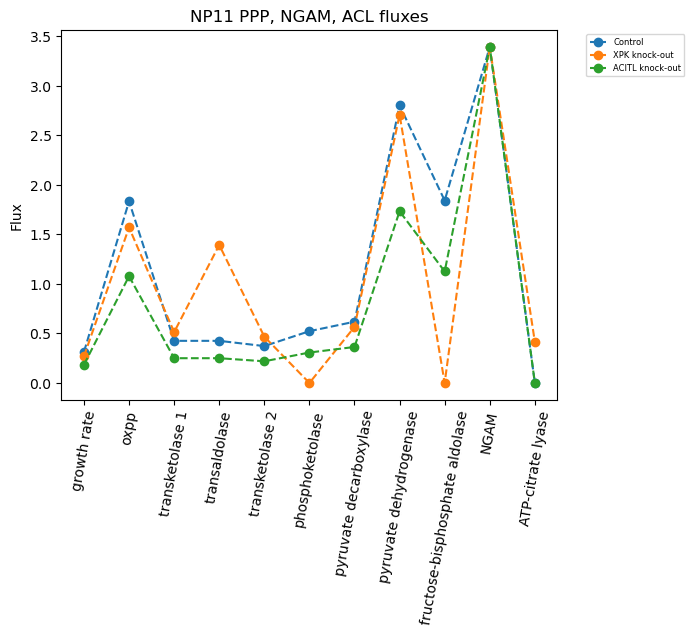

In [36]:
# Plot the PPP enzymes fluxes with ATPM and ACITL 


y = np.abs(all_fluxes_dif_knock_outs[['r_4041', 'r_0466', 'r_1049', 'r_1048','r_1050', 't_0081', 'r_0959', 'r_0961', 'r_0450', 'r_4046', 'y200003']])

for i in range(len(knock_outs)):
    plt.plot(['growth rate', 'oxpp',	'transketolase 1',	'transaldolase',	'transketolase 2',	'phosphoketolase',	'pyruvate decarboxylase',	'pyruvate dehydrogenase',	'fructose-bisphosphate aldolase', 'NGAM', 'ATP-citrate lyase'], y.iloc[i, :], 'o--', label = knock_outs[i])

# plt.xlabel('Reactions')
plt.ylabel('Flux')
plt.title("NP11 PPP, NGAM, ACL fluxes")
plt.legend(fontsize=6, loc='upper left', bbox_to_anchor=(1.05, 1))
plt.xticks(rotation=80)
# plt.yticks(range(0, 4))
plt.show()


In [35]:
# # # Get all fluxes to excel

# with pd.ExcelWriter(f'C:\\Users\\Maive\\Desktop\\BSc_loputoo\\Results\\Knock-outs\\NP11_all_fluxes_knock_outs.xlsx') as excel_writer:
#     all_fluxes_dif_knock_outs.to_excel(excel_writer, sheet_name='Sheet1', index=True)

# # Get csv files
# for i in range(len(knock_outs)):
#     all_fluxes_dif_knock_outs.iloc[i].to_csv(f'C:\\Users\\Maive\\Desktop\\BSc_loputoo\\Results\\Knock-outs\\NP11_all_fluxes_{knock_outs[i]}.csv', index=True)
